In [4]:
collisions <- read.csv("https://raw.githubusercontent.com/Finn-Anderson/BscHons-Data-Analytics/main/collated_collisions_data.csv", stringsAsFactors = TRUE)[order(collisions$collision_date),]

Below is an example of how the data in the collisions table is layed out:

In [ ]:
head(collisions)

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
296,7,2012,7,1,2012-07-01,83.6,63.0,1008.9,9.7,4.1,9.9,18.1,93.0,66.0,0.00,999.9,0,538
1654,1,2012,7,2,2012-07-02,80.3,54.1,1011.6,10.0,3.8,15.0,999.9,88.0,66.9,0.00,999.9,0,564
741,2,2012,7,3,2012-07-03,79.8,56.7,1012.8,10.0,2.9,12.0,999.9,88.0,63.0,0.00,999.9,0,664
574,3,2012,7,4,2012-07-04,81.8,65.6,1009.1,9.2,3.6,11.1,999.9,91.0,68.0,0.06,999.9,0,432
1860,4,2012,7,5,2012-07-05,86.7,64.3,1007.4,9.4,3.8,15.0,999.9,93.9,70.0,99.99,999.9,0,591
335,5,2012,7,6,2012-07-06,81.9,62.3,1011.7,10.0,3.1,9.9,999.9,91.0,66.9,0.00,999.9,0,638


Here is a break down of the information gathered by the collisions table shown as statistics:

In [ ]:
summary(collisions)

      day         year            mo               da           collision_date
 Min.   :1   Min.   :2012   Min.   : 1.000   Min.   : 1.00   2014-02-28:   2  
 1st Qu.:2   1st Qu.:2015   1st Qu.: 4.000   1st Qu.: 8.00   2014-03-01:   2  
 Median :4   Median :2018   Median : 7.000   Median :16.00   2014-03-02:   2  
 Mean   :4   Mean   :2018   Mean   : 6.545   Mean   :15.67   2014-03-03:   2  
 3rd Qu.:6   3rd Qu.:2021   3rd Qu.:10.000   3rd Qu.:23.00   2014-03-04:   2  
 Max.   :7   Max.   :2024   Max.   :12.000   Max.   :31.00   2014-03-05:   2  
                                                             (Other)   :4311  
      temp            dewp               slp            visib       
 Min.   : 5.80   Min.   :  -10.40   Min.   :  989   Min.   : 0.200  
 1st Qu.:41.30   1st Qu.:   32.70   1st Qu.: 1012   1st Qu.: 7.300  
 Median :52.30   Median :   45.50   Median : 1017   Median : 9.500  
 Mean   :52.37   Mean   :   47.16   Mean   : 1145   Mean   : 8.369  
 3rd Qu.:64.80   3rd Qu

day - day in the week.

mo - month in calendar year.

da - day in calendar month.

temp - temperature in Fahrenheit. 9999.9 means no data.

dewp - dew point in Fahrenheit. 9999.9 means no data.

slp - sea level pressure in millibars. 9999.9 means no data.

visib - visibility in miles. 999.9 means no data.

wdsp - wind speed in knots. 999.9 means no data.

mxpsd - maximum sustained wind speed in knots. 999.9 means no data.

gust - maximum wind gust in knots. 999.9 means no data.

max - maximum temperature recorded in Fahrenheit. 9999.9 means no data.

min - minimum temperature recorded in Fahrenheit. 9999.9 means no data.

prcp - total precipitation reported in inches. 99.9 means no rain.

sndp - snow depth in inches. 999.9 means no snow.

fog - indiators if occurred on a day (1 means yes, 0 means no).

The following two graphs show collisions by day of the week, day of the month and day of the year respectively:

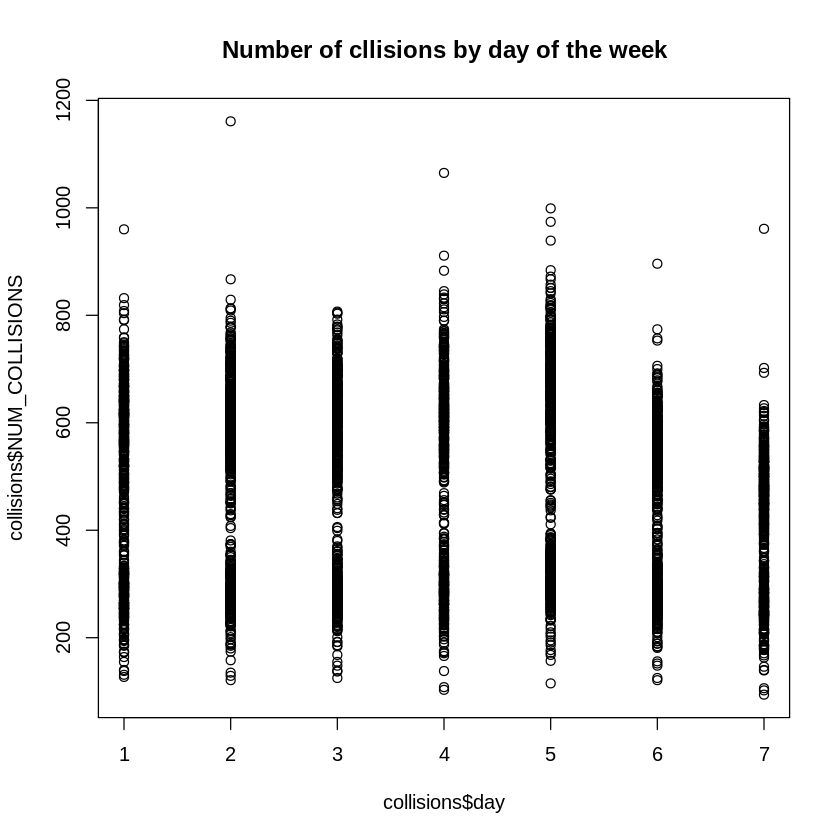

In [ ]:
plot(collisions$day, collisions$NUM_COLLISIONS, main="Number of collisions by day of the week")

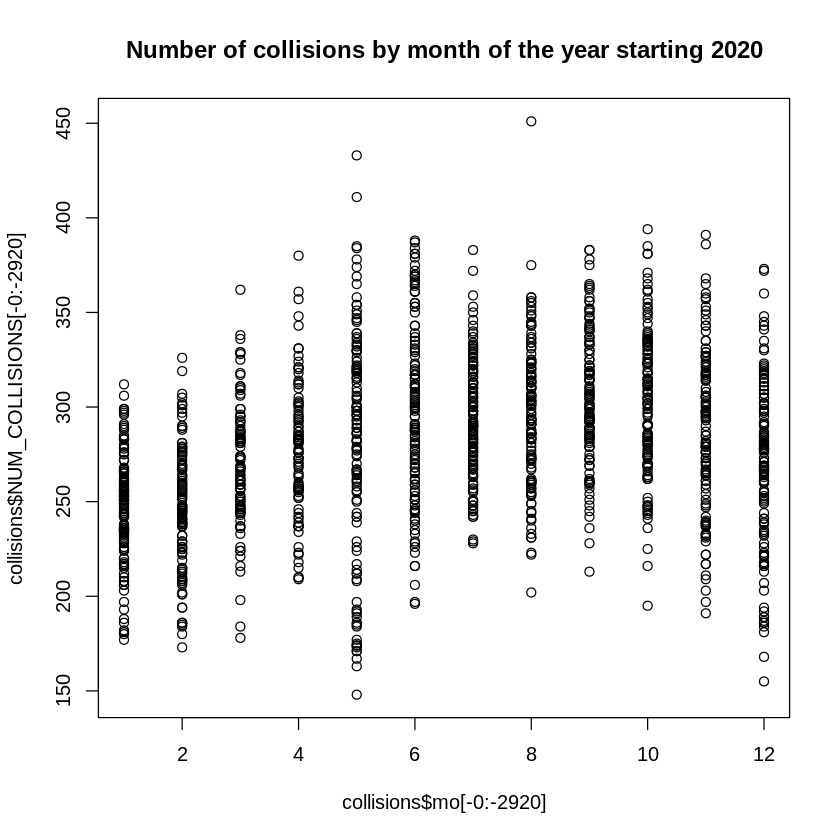

In [ ]:
plot(collisions$mo[-0:-2920], collisions$NUM_COLLISIONS[-0:-2920], main="Number of collisions by month of the year since mid-2020")

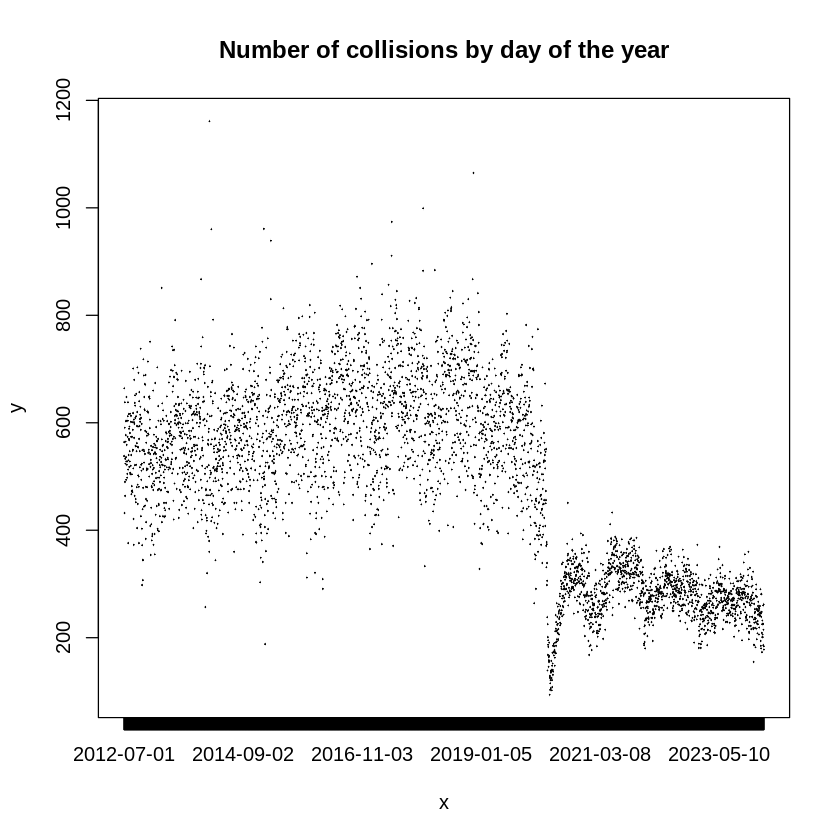

In [ ]:
plot(collisions$collision_date, collisions$NUM_COLLISIONS, main="Number of collisions by day of the year")

After plotting the collision data, it is clearly showing a trend of less collisions on the weekends (6-7) and less in recent years. A significant drop occurred in 2020 and although this is likely due to Covid-19 and the subsequent lockdown(s) that followed, it is interesting to note that the number of collisions never rose back to pre-covid levels. In-fact, it looks like the number of collisions are actually decreasing year-by-year.

The month by year graph also shows that January experiences the least amount of collisions every year since mid-2020 when lockdown(s) occurred.

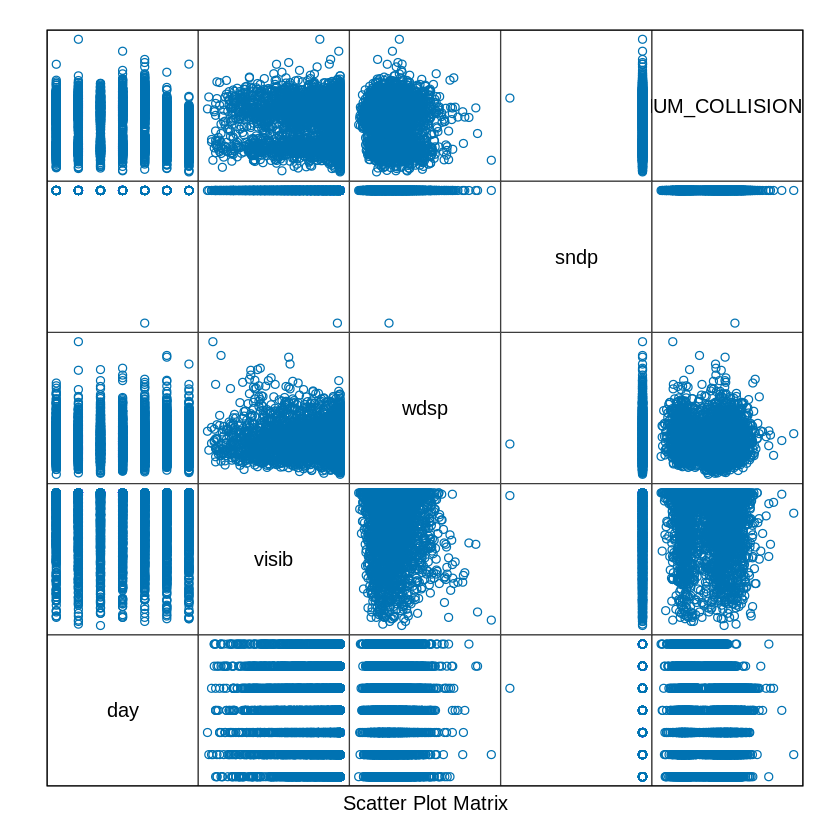

In [ ]:
splom(~ collisions[,c(1, 9, 10, 16, 18)], groups=NULL, data=collisions, axis.line.tck=0, axis.text.alpha=0)

Above are the usual suspects for collisions compiled in a scattor plot matrix. This scatter plot does not show much in terms of the effects weather has on the number of collisions, but it does have an outlier.

Visibility and wind speed don't seem to have an affect on the number of collisions, as the seem consistent no matter the value.

Looking at the snow dropped in inches, there is only one dot on the graph that shows snow being recorded (the dot on the left hand-side). This dot shows that snow has a huge reason for why collisions occur, as shown being quiet high up in the number of collisions depsite only being a singular dot. However, because of the low-sample size, the singular dot could be skewing the results. So, it is important to take this with a grain of salt.

After looking at the main suspects in a scatter plot matrix and finding no major correlation, it is time to analyse the correlation between all of the different types of weather and the number of collisions.

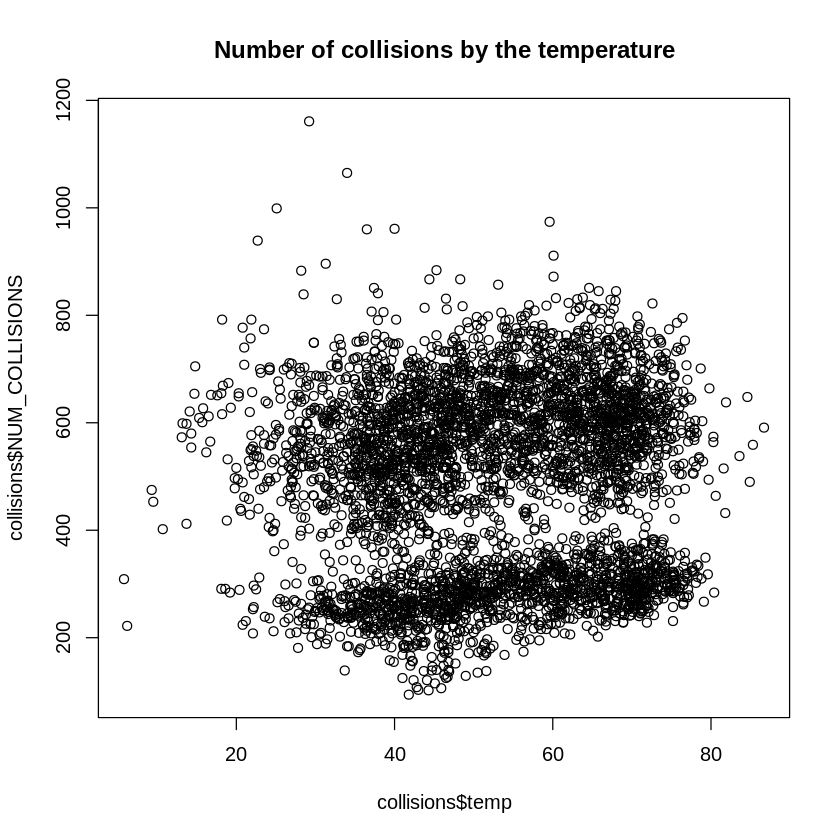

In [ ]:
plot(collisions$temp, collisions$NUM_COLLISIONS, main="Number of collisions by the temperature")

In [ ]:
cor(collisions$temp, collisions$NUM_COLLISIONS)

[1] 0.05316626

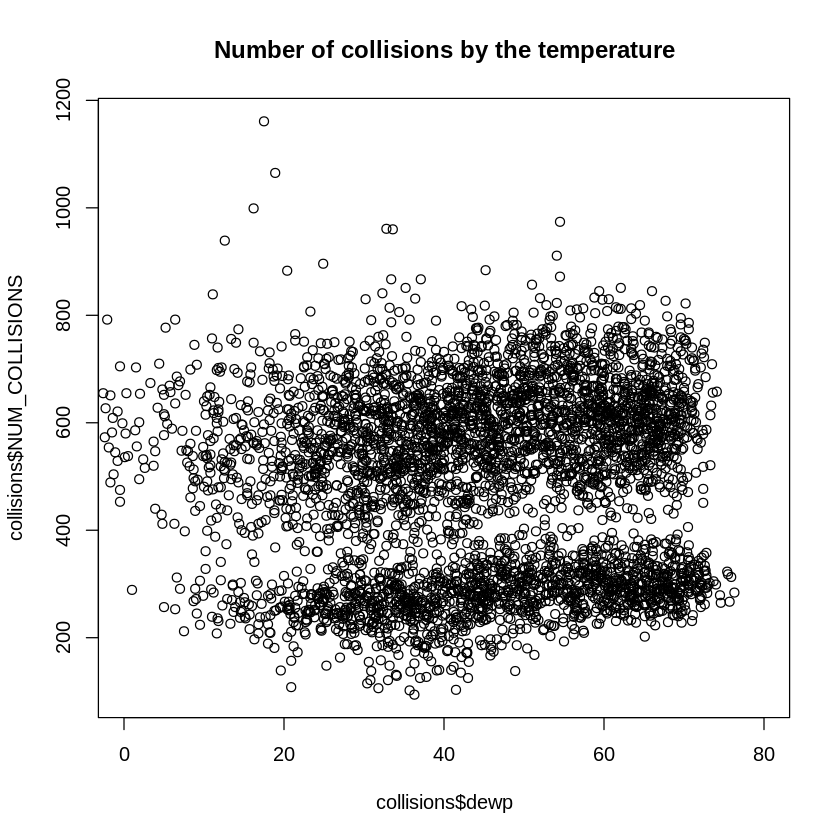

In [ ]:
plot(collisions$dewp, collisions$NUM_COLLISIONS, main="Number of collisions by the temperature", xlim=c(0, 80))

In [ ]:
cor(collisions$dewp, collisions$NUM_COLLISIONS)

[1] 0.01712421

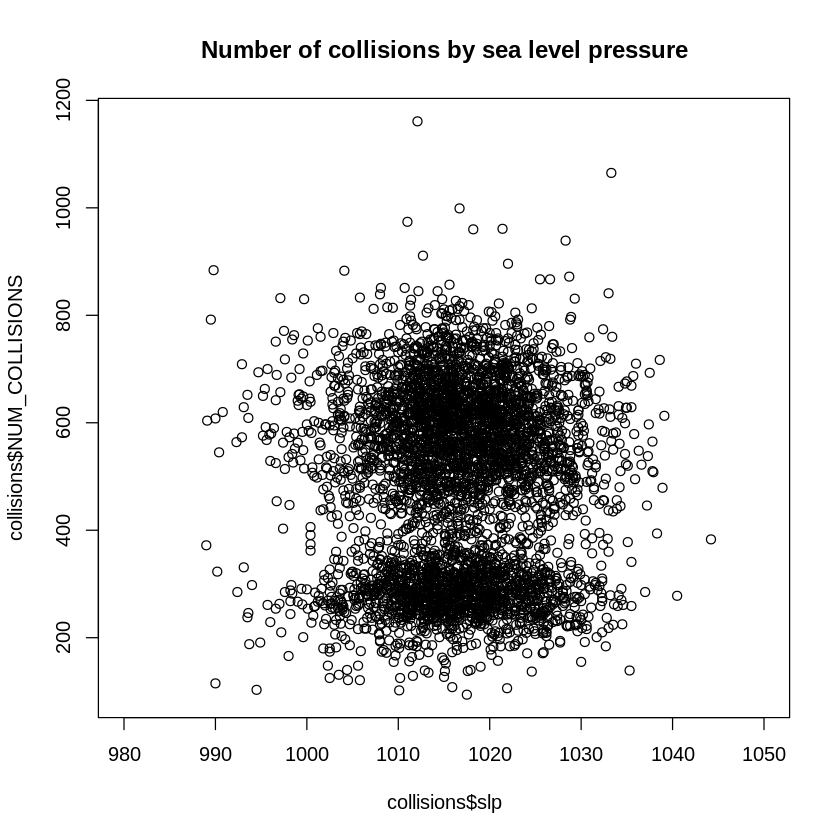

In [ ]:
plot(collisions$slp, collisions$NUM_COLLISIONS, main="Number of collisions by sea level pressure", xlim=c(980, 1050))

In [ ]:
cor(collisions$slp, collisions$NUM_COLLISIONS)

[1] 0.04714199

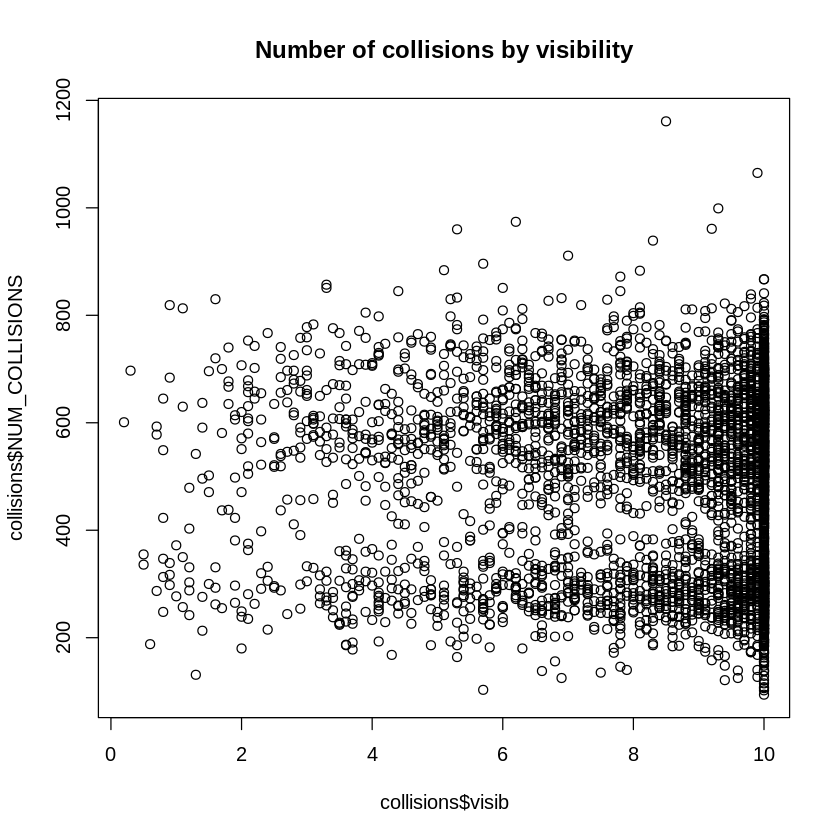

In [ ]:
plot(collisions$visib, collisions$NUM_COLLISIONS, main="Number of collisions by visibility")

In [ ]:
cor(collisions$visib, collisions$NUM_COLLISIONS)

[1] -0.05159259

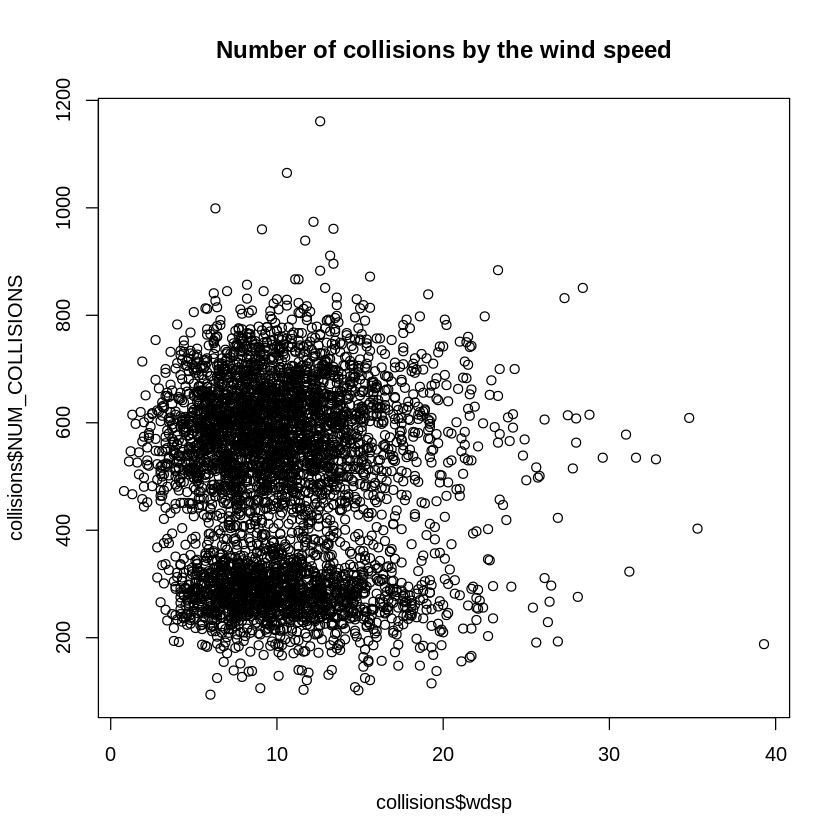

In [ ]:
plot(collisions$wdsp, collisions$NUM_COLLISIONS, main="Number of collisions by the wind speed")

In [ ]:
cor(collisions$wdsp, collisions$NUM_COLLISIONS)

[1] -0.03159009

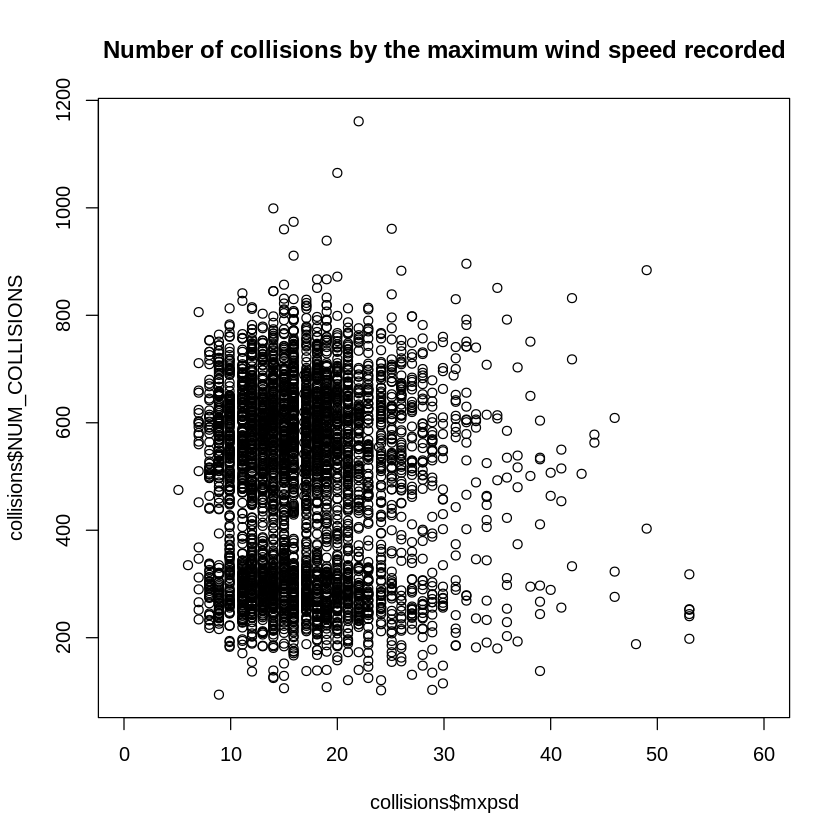

In [ ]:
plot(collisions$mxpsd, collisions$NUM_COLLISIONS, main="Number of collisions by the maximum wind speed recorded", xlim=c(0, 60))

In [ ]:
cor(collisions$mxpsd, collisions$NUM_COLLISIONS)

[1] -0.09038686

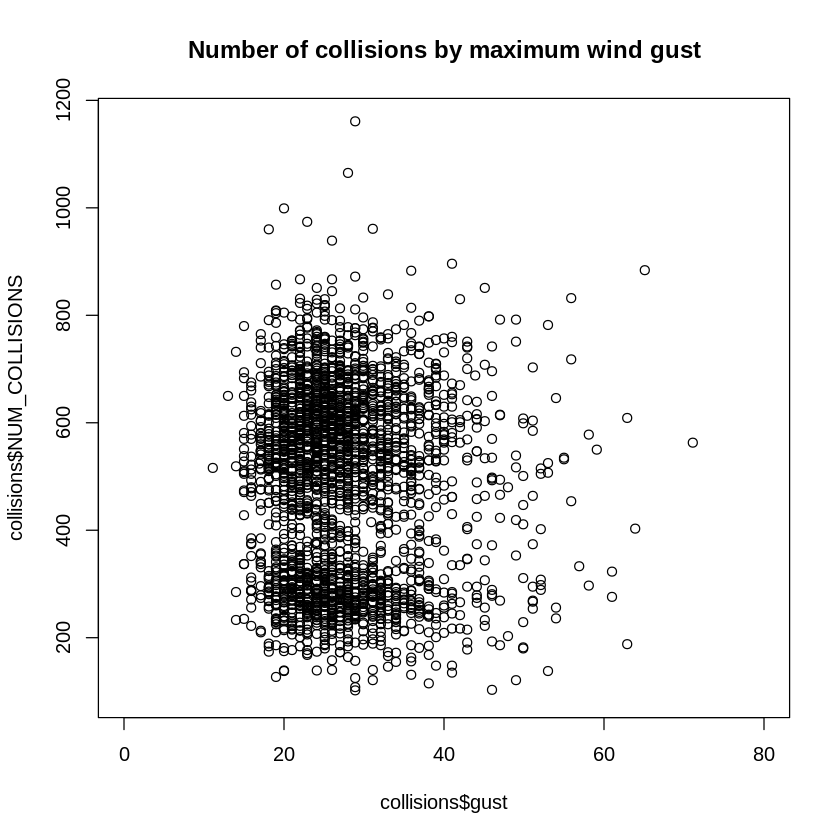

In [ ]:
plot(collisions$gust, collisions$NUM_COLLISIONS, main="Number of collisions by maximum wind gust", xlim=c(0, 80))

In [ ]:
cor(collisions$gust, collisions$NUM_COLLISIONS)

[1] -0.0348383

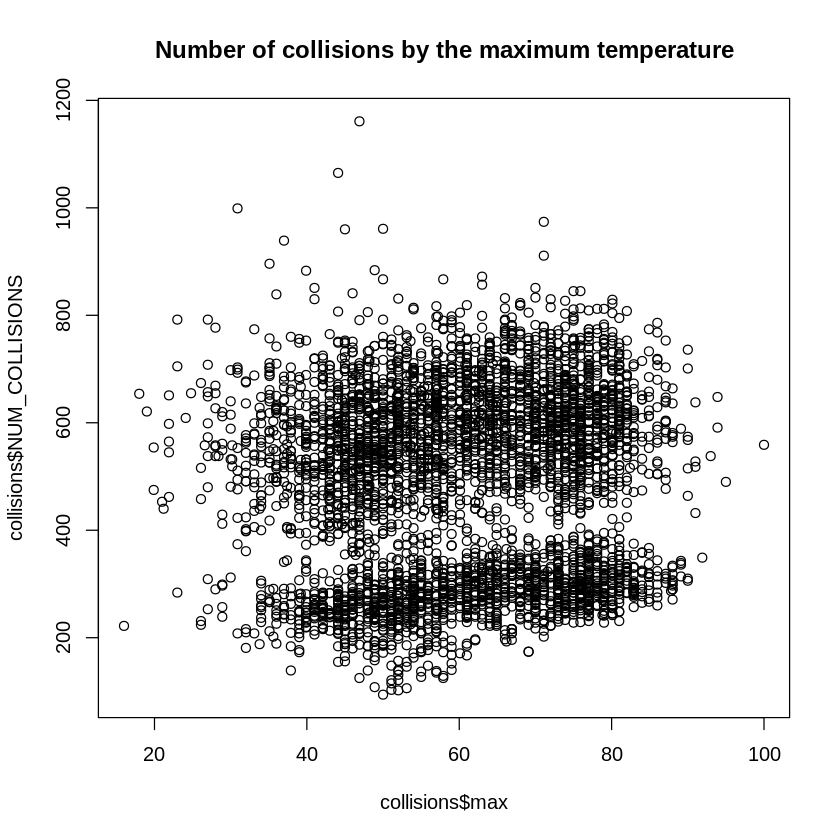

In [ ]:
plot(collisions$max, collisions$NUM_COLLISIONS, main="Number of collisions by the maximum temperature")

In [ ]:
cor(collisions$max, collisions$NUM_COLLISIONS)

[1] 0.06078731

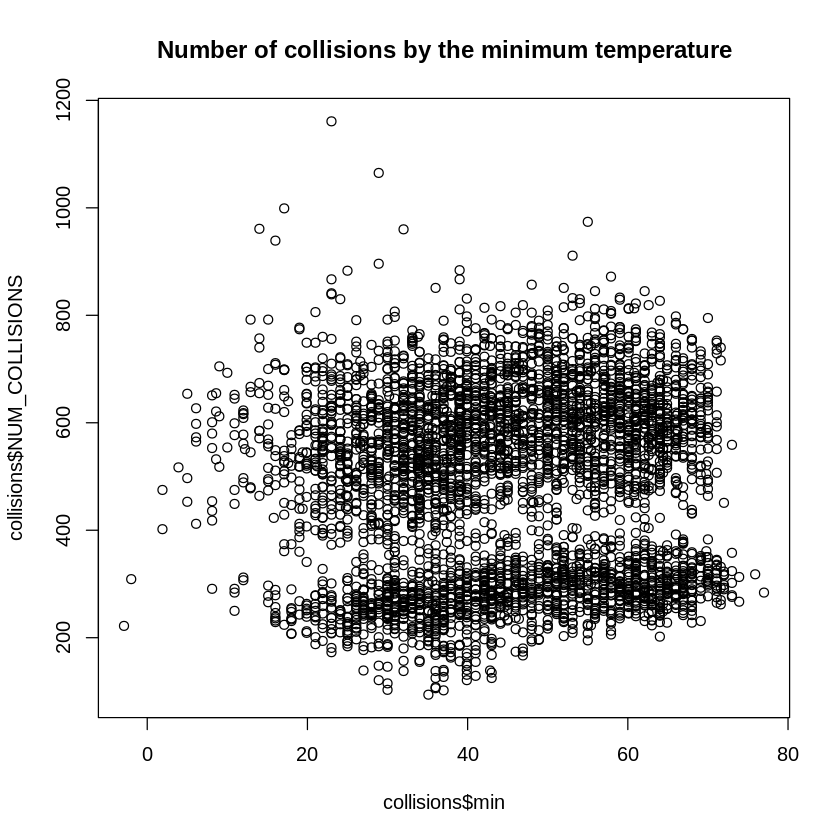

In [ ]:
plot(collisions$min, collisions$NUM_COLLISIONS, main="Number of collisions by the minimum temperature")

In [ ]:
cor(collisions$min, collisions$NUM_COLLISIONS)

[1] 0.04888501

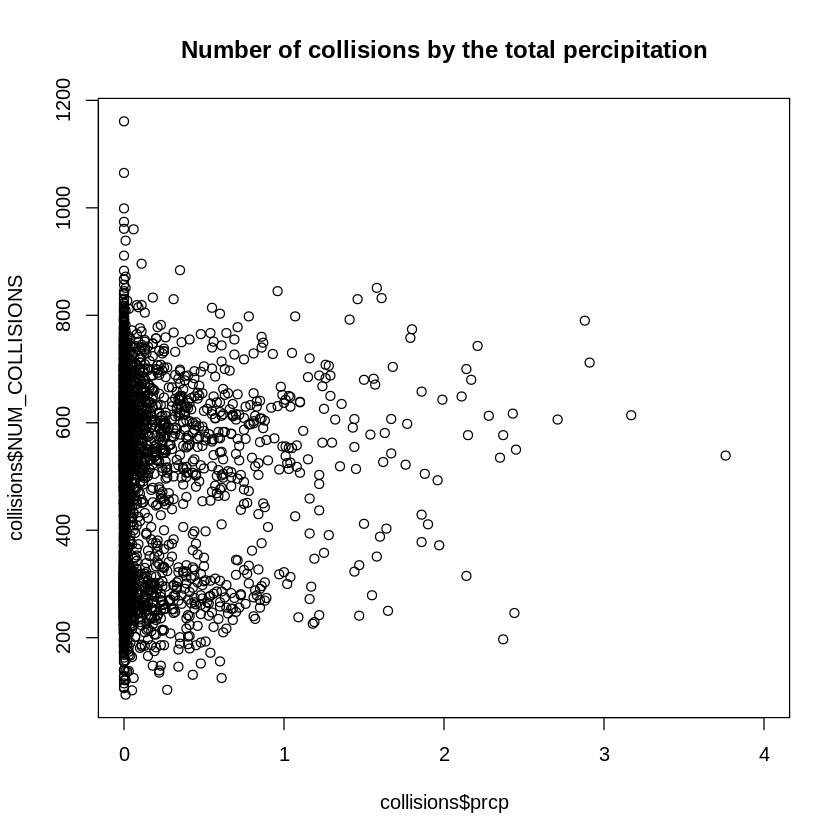

In [ ]:
plot(collisions$prcp, collisions$NUM_COLLISIONS, main="Number of collisions by the total percipitation", xlim=c(0, 4))

In [ ]:
cor(collisions$prcp, collisions$NUM_COLLISIONS)

[1] 0.01110768

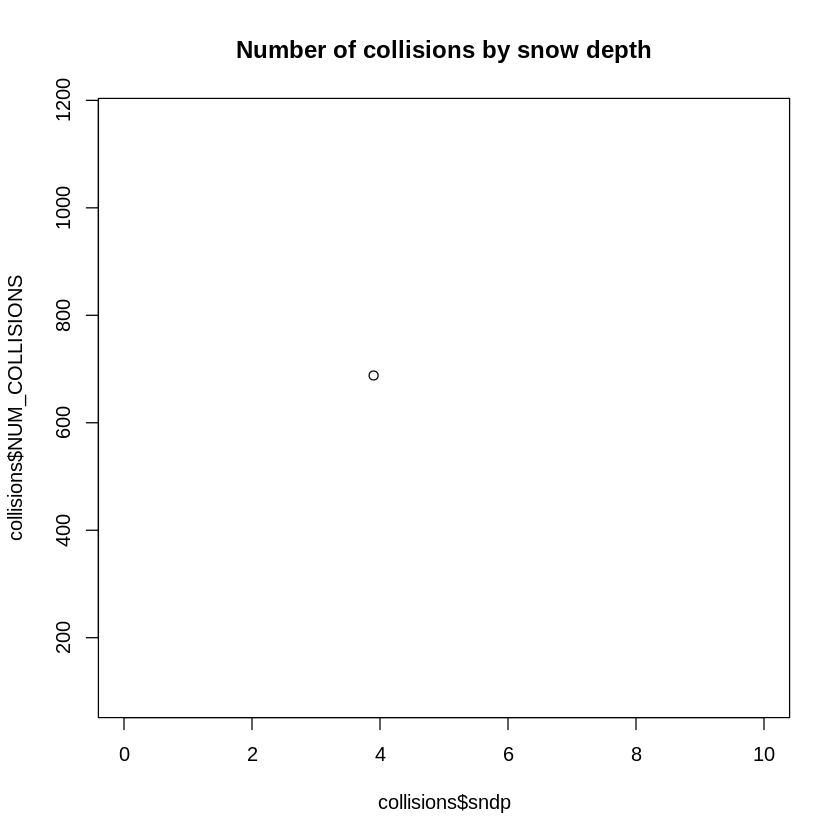

In [ ]:
plot(collisions$sndp, collisions$NUM_COLLISIONS, main="Number of collisions by snow depth", xlim=c(0, 10))

In [ ]:
cor(collisions$sndp, collisions$NUM_COLLISIONS)

[1] -0.01783011

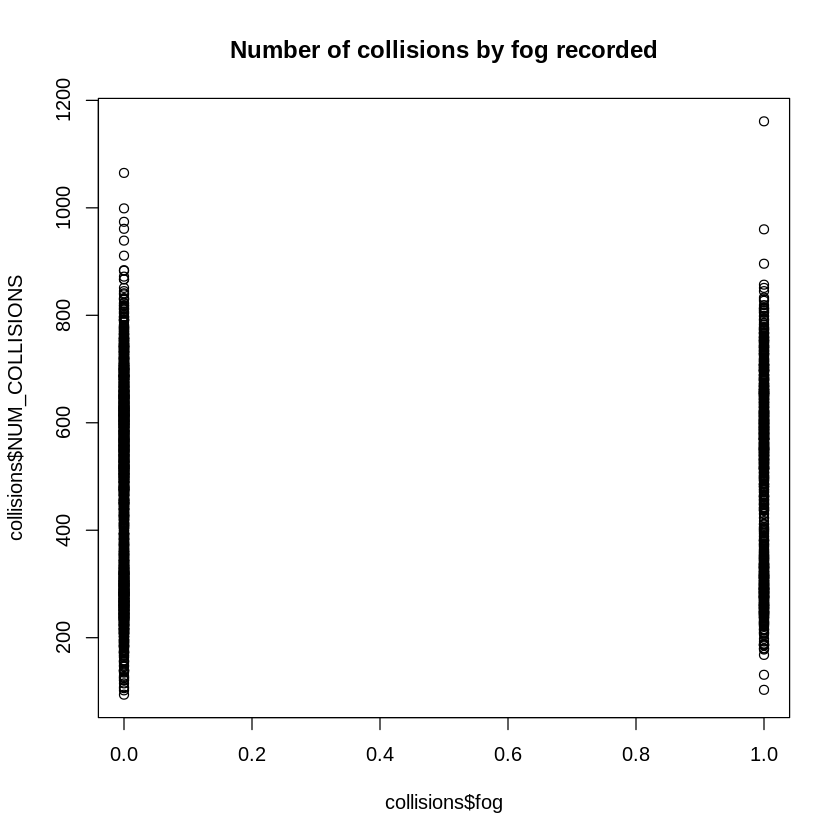

In [ ]:
plot(collisions$fog, collisions$NUM_COLLISIONS, main="Number of collisions by fog recorded")

In [ ]:
cor(collisions$fog, collisions$NUM_COLLISIONS)

[1] 0.03655138

Using the above data and correlations, it shows there is barely any correlation between the weather and the number of collisions across the years, with the highest negative correlation being max wind speed -0.09 and the highest positive correlation being max temperature at 0.06.

With the number of collisions by day of the year graph, it showed a drop in the number of collisions in 2020 and stayed lower in the years to the current date. The results of those years could be different from the results in the years prior to 2020, so lets split them up and view them in a graph colour coded by year.

In [11]:
colsplitcheck <- collisions

In [12]:
colsc19 <- colsplitcheck[which(colsplitcheck$year == 2019), ]

dayofyear <- 1*seq_len(nrow(colsc19))
dayindex <- 1*seq_len(nrow(colsc19))
colsc19a <- cbind(dayindex, dayofyear, colsc19)

In [13]:
colsc20 <- colsplitcheck[which(colsplitcheck$year == 2020), ]

dayofyear <- 1*seq_len(nrow(colsc20))
dayindex <- 1*seq_len(nrow(colsc20)) + 365
colsc20a <- cbind(dayindex, dayofyear, colsc20)

In [14]:
colsc21 <- colsplitcheck[which(colsplitcheck$year == 2021), ]

dayofyear <- 1*seq_len(nrow(colsc21))
dayindex <- 1*seq_len(nrow(colsc21)) + 730
colsc21a <- cbind(dayindex, dayofyear, colsc21)

In [15]:
colsc22 <- colsplitcheck[which(colsplitcheck$year == 2022), ]

dayofyear <- 1*seq_len(nrow(colsc22))
dayindex <- 1*seq_len(nrow(colsc22)) + 1095
colsc22a <- cbind(dayindex, dayofyear, colsc22)

In [16]:
colsc23 <- colsplitcheck[which(colsplitcheck$year == 2023), ]

dayofyear <- 1*seq_len(nrow(colsc23))
dayindex <- 1*seq_len(nrow(colsc23)) + 1460
colsc23a <- cbind(dayindex, dayofyear, colsc23)

In [30]:
library(ggplot2)

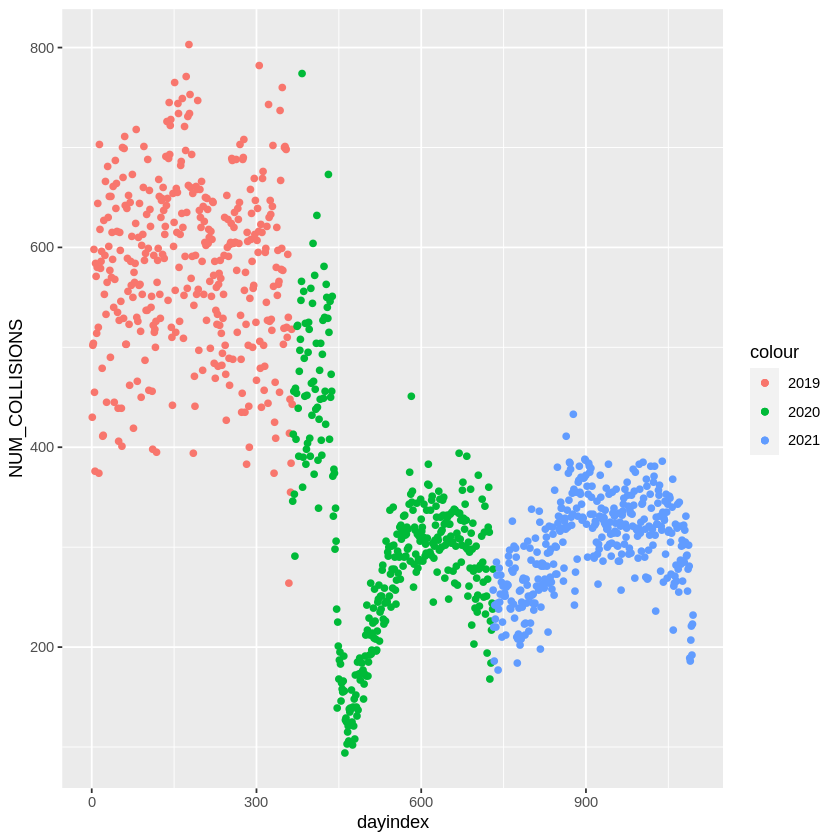

In [ ]:
ggplot() +
  geom_point(data=colsc19a, aes(dayindex, NUM_COLLISIONS, color="2019")) +
  geom_point(data=colsc20a, aes(dayindex, NUM_COLLISIONS, color="2020")) +
  geom_point(data=colsc21a, aes(dayindex, NUM_COLLISIONS, color="2021"))

The graph above shows a clearer view of the drop off on the number of collisions in early-to-mid 2020.

Now let's take the highest correlations when the whole dataset was checked (max wind speed and max temperature) and check them against the data when confined by year. For this, 2022 and 2023 will also be checked to see if the correlation is rising in recent years.

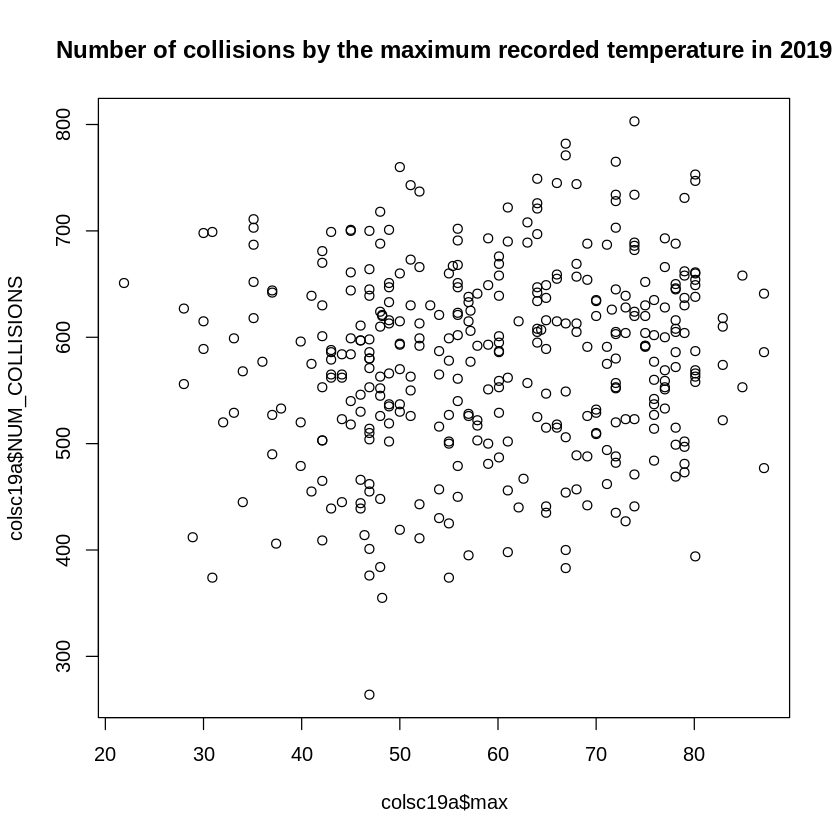

In [ ]:
plot(colsc19a$max, colsc19a$NUM_COLLISIONS, main="Number of collisions by the maximum recorded temperature in 2019")

In [ ]:
cor(colsc19a$max, colsc19a$NUM_COLLISIONS)

[1] 0.1164604

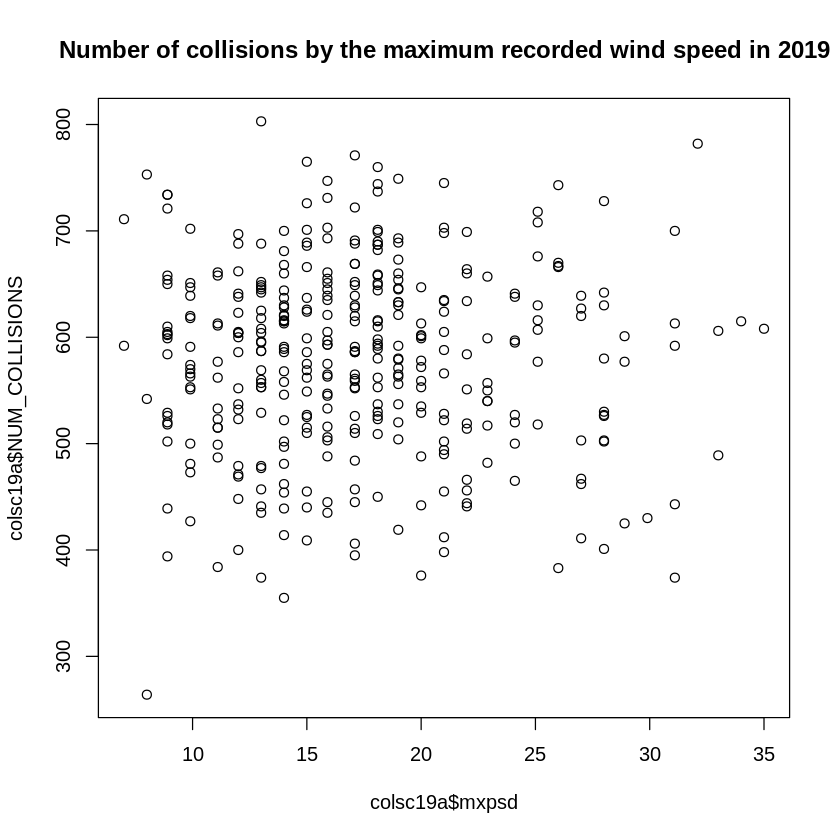

In [ ]:
plot(colsc19a$mxpsd, colsc19a$NUM_COLLISIONS, main="Number of collisions by the maximum recorded wind speed in 2019")

In [ ]:
cor(colsc19a$mxpsd, colsc19a$NUM_COLLISIONS)

[1] -0.01635937

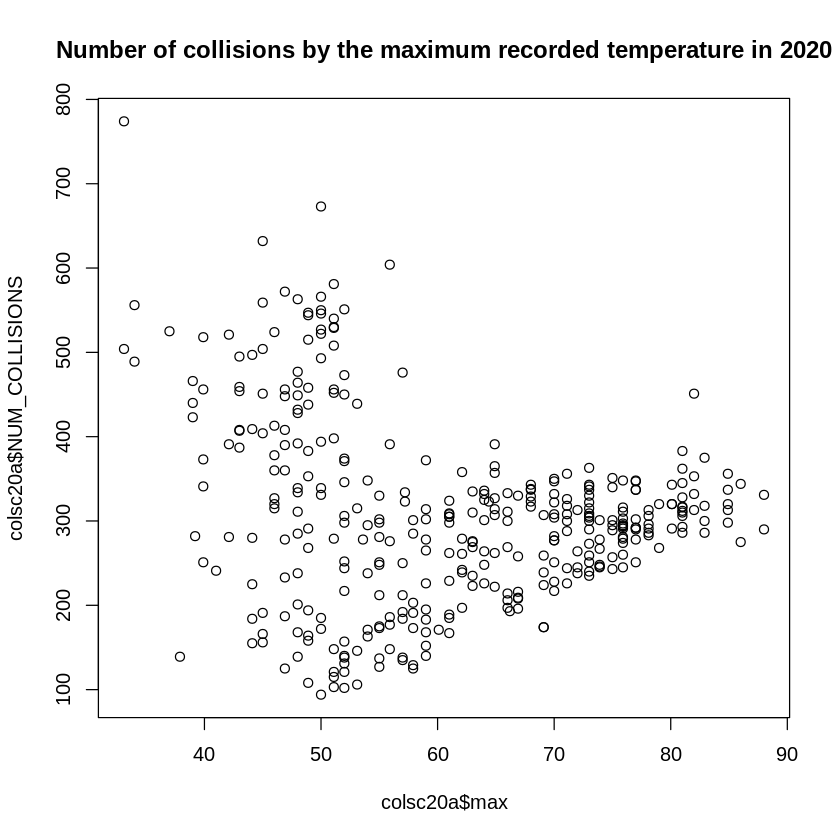

In [ ]:
plot(colsc20a$max, colsc20a$NUM_COLLISIONS, main="Number of collisions by the maximum recorded temperature in 2020")

In [ ]:
cor(colsc20a$max, colsc20a$NUM_COLLISIONS)

[1] -0.2177104

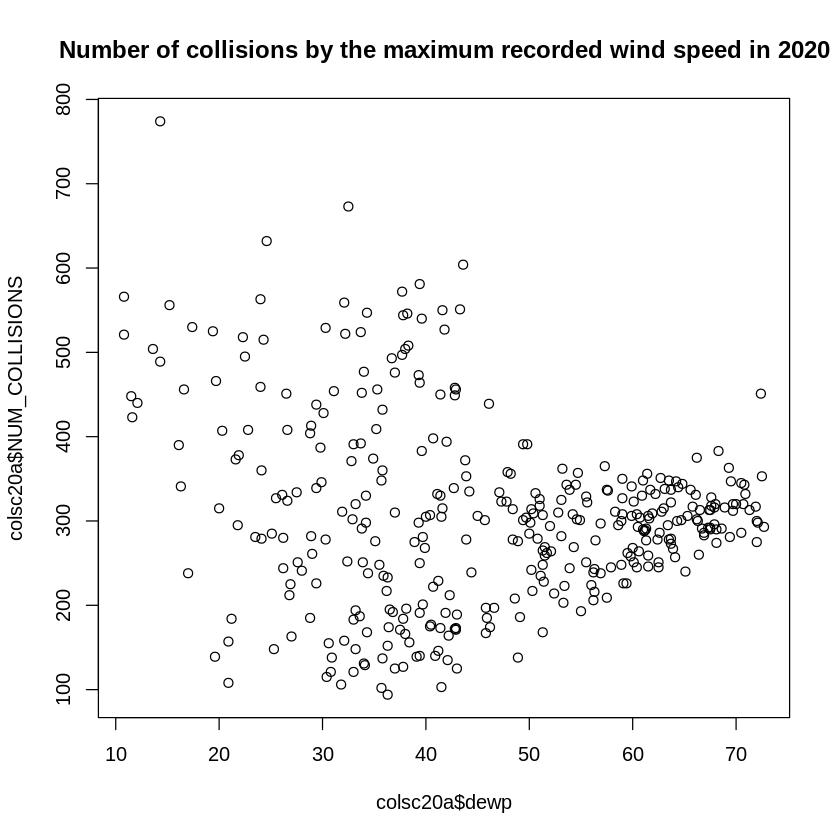

In [ ]:
plot(colsc20a$mxpsd, colsc20a$NUM_COLLISIONS, main="Number of collisions by the maximum recorded wind speed in 2020")

In [ ]:
cor(colsc20a$mxpsd, colsc20a$NUM_COLLISIONS)

[1] -0.0195595

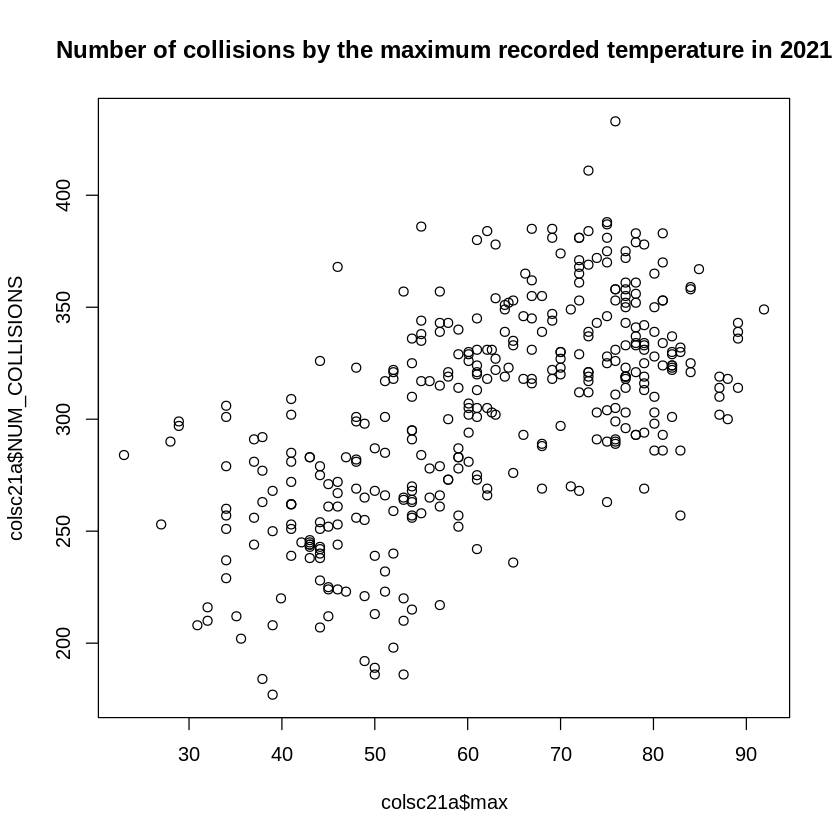

In [ ]:
plot(colsc21a$max, colsc21a$NUM_COLLISIONS, main="Number of collisions by the maximum recorded temperature in 2021")

In [ ]:
cor(colsc21a$max, colsc21a$NUM_COLLISIONS)

[1] 0.632203

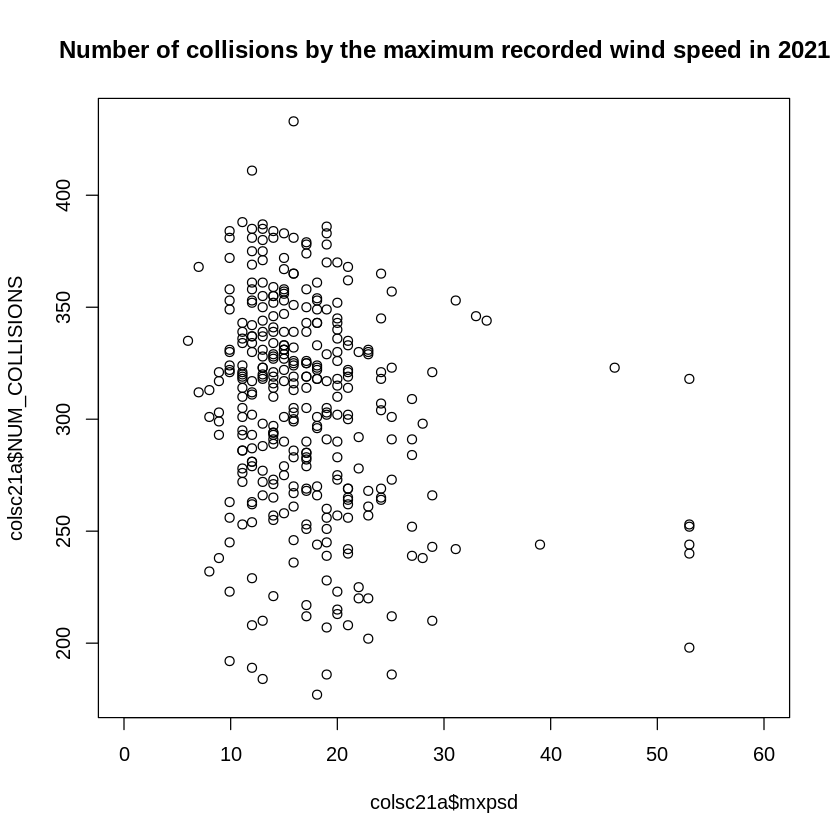

In [ ]:
plot(colsc21a$mxpsd, colsc21a$NUM_COLLISIONS, main="Number of collisions by the maximum recorded wind speed in 2021", xlim=c(0, 60))

In [ ]:
cor(colsc21a$mxpsd, colsc21a$NUM_COLLISIONS)

[1] -0.1959115

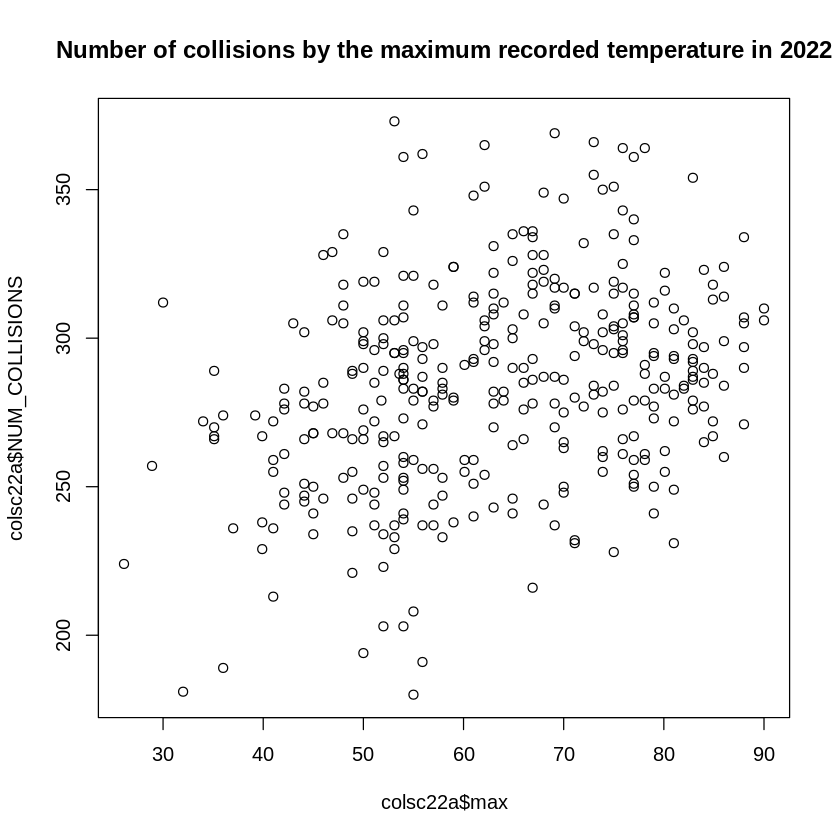

In [ ]:
plot(colsc22a$max, colsc22a$NUM_COLLISIONS, main="Number of collisions by the maximum recorded temperature in 2022")

In [ ]:
cor(colsc22a$max, colsc22a$NUM_COLLISIONS)

[1] 0.3192548

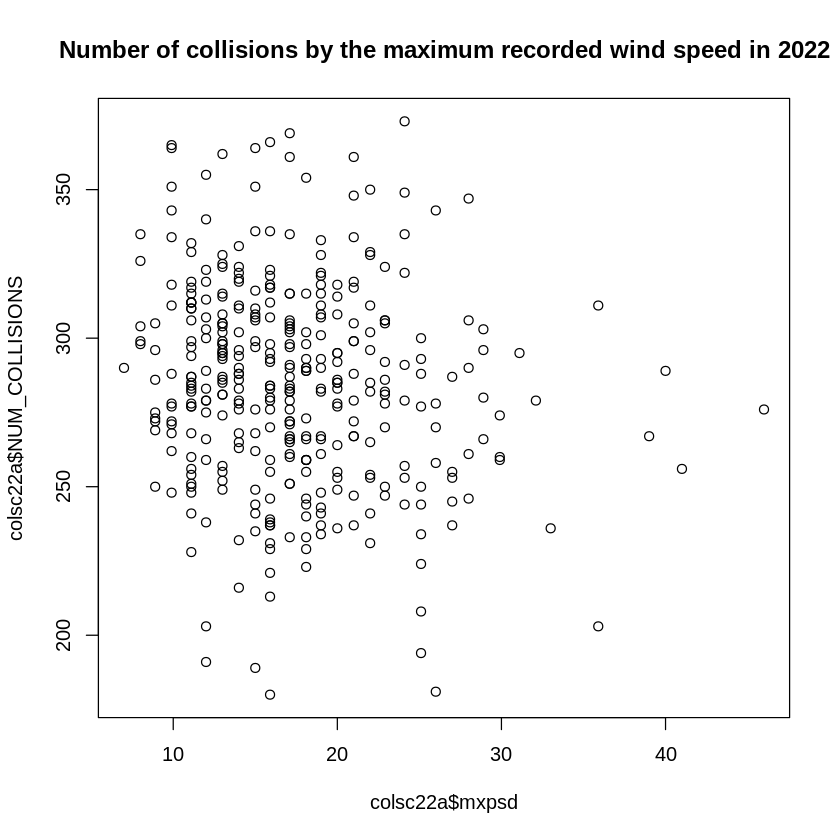

In [ ]:
plot(colsc22a$mxpsd, colsc22a$NUM_COLLISIONS, main="Number of collisions by the maximum recorded wind speed in 2022")

In [ ]:
cor(colsc22a$mxpsd, colsc22a$NUM_COLLISIONS)

[1] -0.1542428

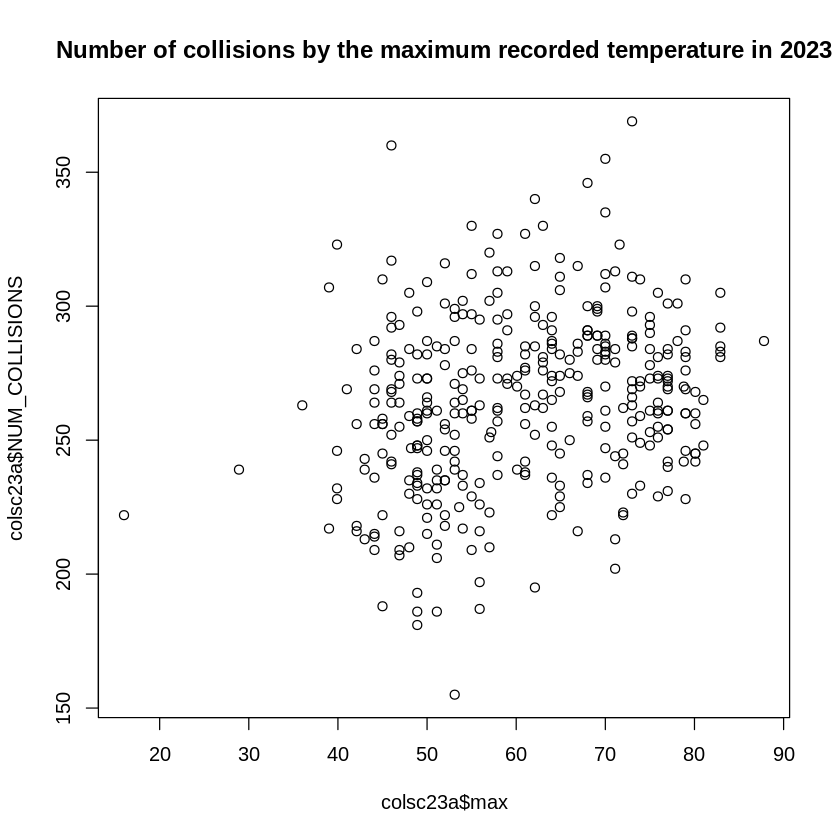

In [ ]:
plot(colsc23a$max, colsc23a$NUM_COLLISIONS, main="Number of collisions by the maximum recorded temperature in 2023")

In [ ]:
cor(colsc23a$max, colsc23a$NUM_COLLISIONS)

[1] 0.2477012

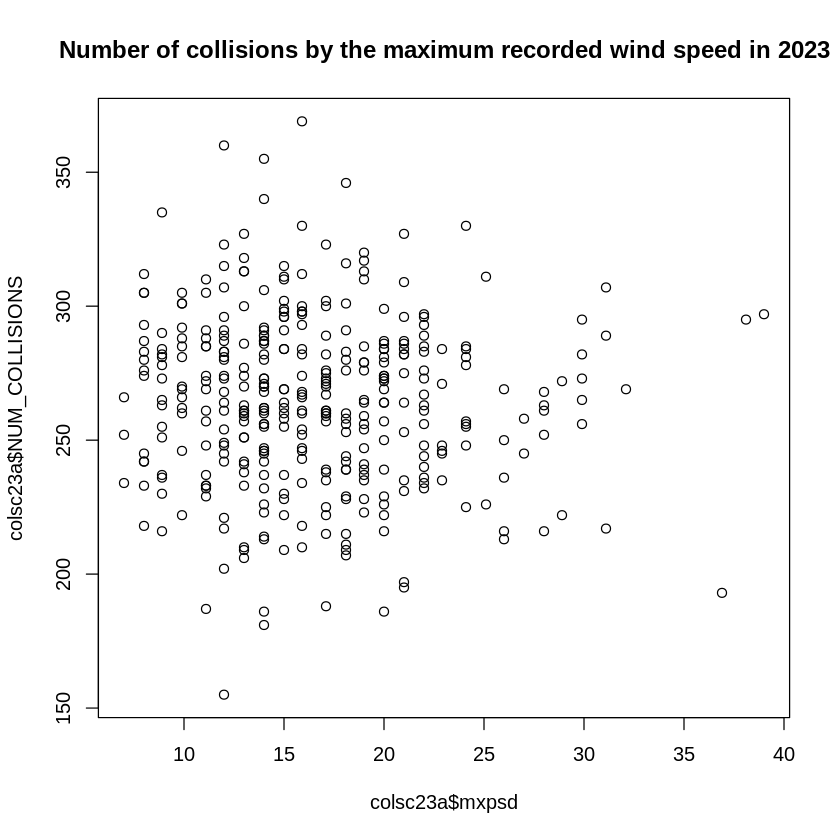

In [ ]:
plot(colsc23a$mxpsd, colsc23a$NUM_COLLISIONS, main="Number of collisions by the maximum recorded wind speed in 2023")

In [ ]:
cor(colsc23a$mxpsd, colsc23a$NUM_COLLISIONS)

[1] -0.05444606

In [ ]:
cor(colsc19a$temp, colsc19a$NUM_COLLISIONS)

[1] 0.1329058

In [ ]:
cor(colsc20a$temp, colsc20a$NUM_COLLISIONS)

[1] -0.2169225

In [ ]:
cor(colsc21a$temp, colsc21a$NUM_COLLISIONS)

[1] 0.6183139

In [ ]:
cor(colsc22a$temp, colsc22a$NUM_COLLISIONS)

[1] 0.3284157

In [ ]:
cor(colsc23a$temp, colsc23a$NUM_COLLISIONS)

[1] 0.2336746

Max wind speed does not seem to correlate to the number of collisions in recent years.

However, temperature does show a correlation to the number of collisions and also shows a rising correlation since 2019. Although it seems to be lowering since peak correlation in 2021, 2023 correlation is still higher than 2019, indicating that temperature could be affecting the number collisions.

Now standardization will be used across the number of collisions starting 2020. This is because the results of recent years differ from those in prior years. Standardization is achieved using R's inbuilt scale() function.

In [59]:
colsc20b <- colsc20a

standardized20 <- as.data.frame(scale(colsc20b$NUM_COLLISIONS))
colsc20b$NUM_COLLISIONS <- standardized20$V1

In [60]:
colsc21b <- colsc21a

standardized21 <- as.data.frame(scale(colsc21b$NUM_COLLISIONS))
colsc21b$NUM_COLLISIONS <- standardized21$V1

In [61]:
colsc22b <- colsc22a

standardized22 <- as.data.frame(scale(colsc22b$NUM_COLLISIONS))
colsc22b$NUM_COLLISIONS <- standardized22$V1

In [57]:
colsc23b <- colsc23a

standardized23 <- as.data.frame(scale(colsc23b$NUM_COLLISIONS))
colsc23b$NUM_COLLISIONS <- standardized23$V1

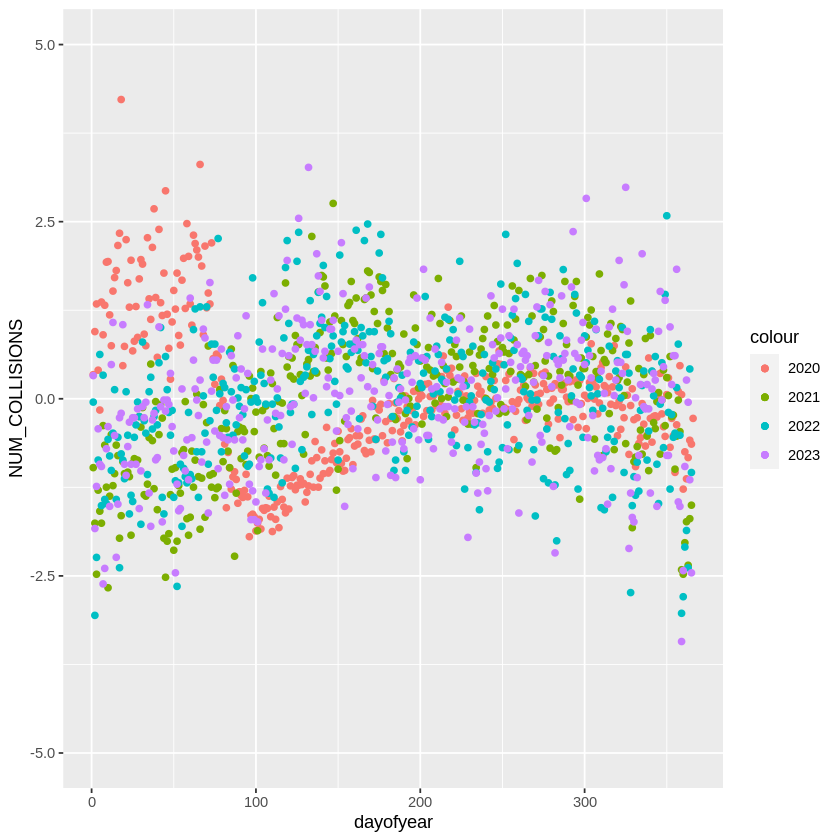

In [63]:
sp <- ggplot() +
  geom_point(data=colsc20b, aes(dayofyear, NUM_COLLISIONS, color="2020")) +
  geom_point(data=colsc21b, aes(dayofyear, NUM_COLLISIONS, color="2021")) +
  geom_point(data=colsc22b, aes(dayofyear, NUM_COLLISIONS, color="2022")) +
  geom_point(data=colsc23b, aes(dayofyear, NUM_COLLISIONS, color="2023"))

sp+ylim(-5, 5)

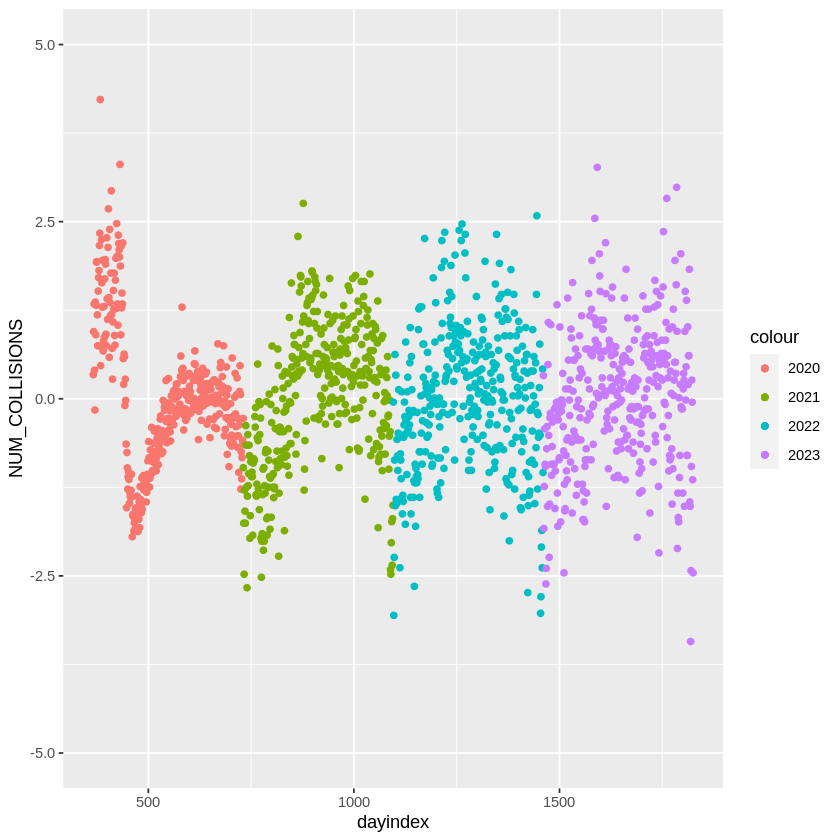

In [64]:
sp <- ggplot() +
  geom_point(data=colsc20b, aes(dayindex, NUM_COLLISIONS, color="2020")) +
  geom_point(data=colsc21b, aes(dayindex, NUM_COLLISIONS, color="2021")) +
  geom_point(data=colsc22b, aes(dayindex, NUM_COLLISIONS, color="2022")) +
  geom_point(data=colsc23b, aes(dayindex, NUM_COLLISIONS, color="2023"))

sp+ylim(-5, 5)

Since 2020, the amount of deviation by the mean number of collisions for that year has been increasing, indicating that the number of collisions per day are becoming increasingly varied.

NOTE: The affect climate change has on the weather can create inconsistent weather paterns and could be contributing to the higher variance per year.

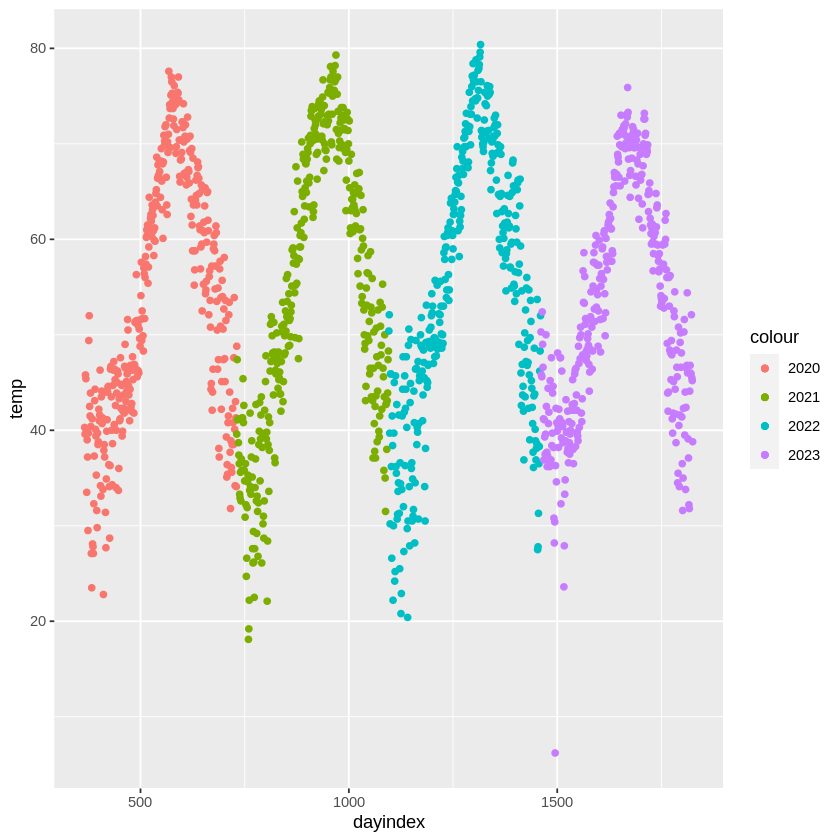

In [ ]:
ggplot() +
  geom_point(data=colsc20b, aes(dayindex, temp, color="2020")) +
  geom_point(data=colsc21b, aes(dayindex, temp, color="2021")) +
  geom_point(data=colsc22b, aes(dayindex, temp, color="2022")) +
  geom_point(data=colsc23b, aes(dayindex, temp, color="2023"))

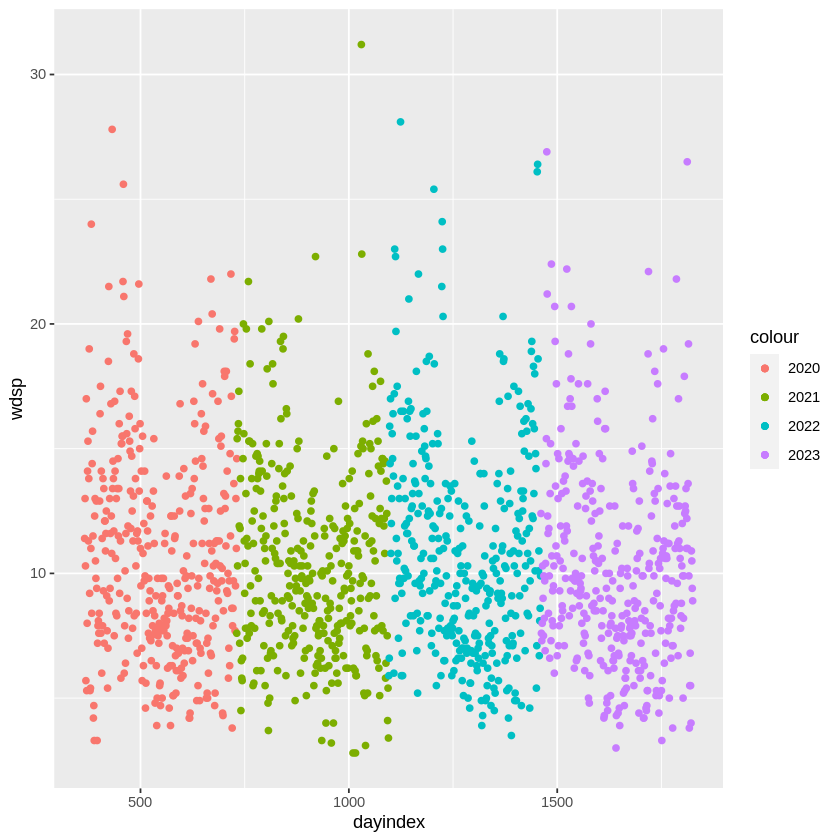

In [ ]:
ggplot() +
  geom_point(data=colsc20b, aes(dayindex, wdsp, color="2020")) +
  geom_point(data=colsc21b, aes(dayindex, wdsp, color="2021")) +
  geom_point(data=colsc22b, aes(dayindex, wdsp, color="2022")) +
  geom_point(data=colsc23b, aes(dayindex, wdsp, color="2023"))

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


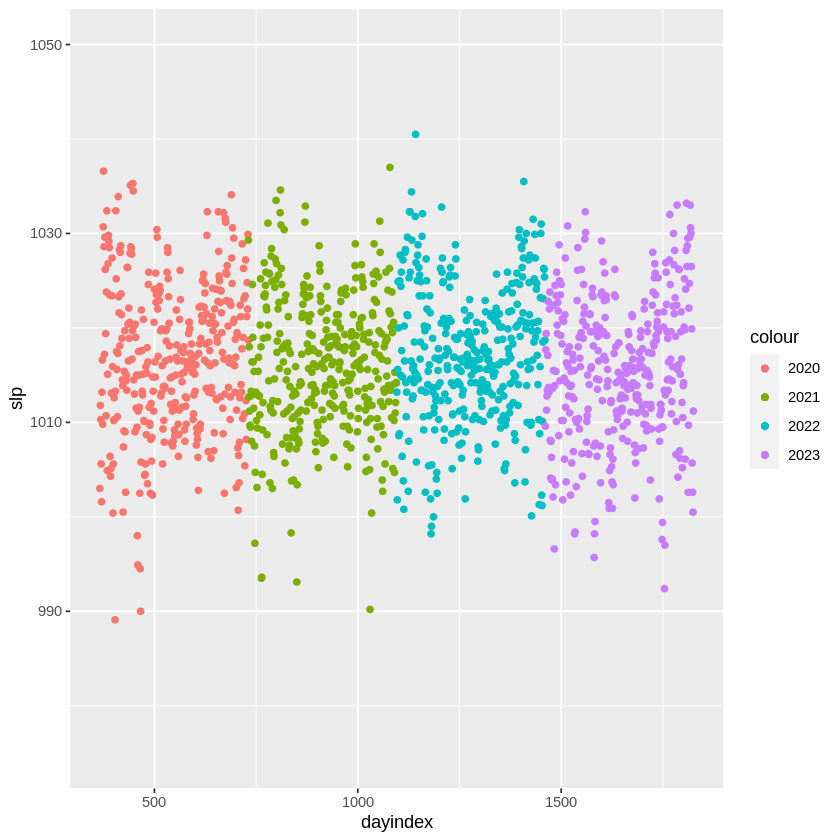

In [ ]:
sp <- ggplot() +
  geom_point(data=colsc20b, aes(dayindex, slp, color="2020")) +
  geom_point(data=colsc21b, aes(dayindex, slp, color="2021")) +
  geom_point(data=colsc22b, aes(dayindex, slp, color="2022")) +
  geom_point(data=colsc23b, aes(dayindex, slp, color="2023"))

sp+ylim(975, 1050)

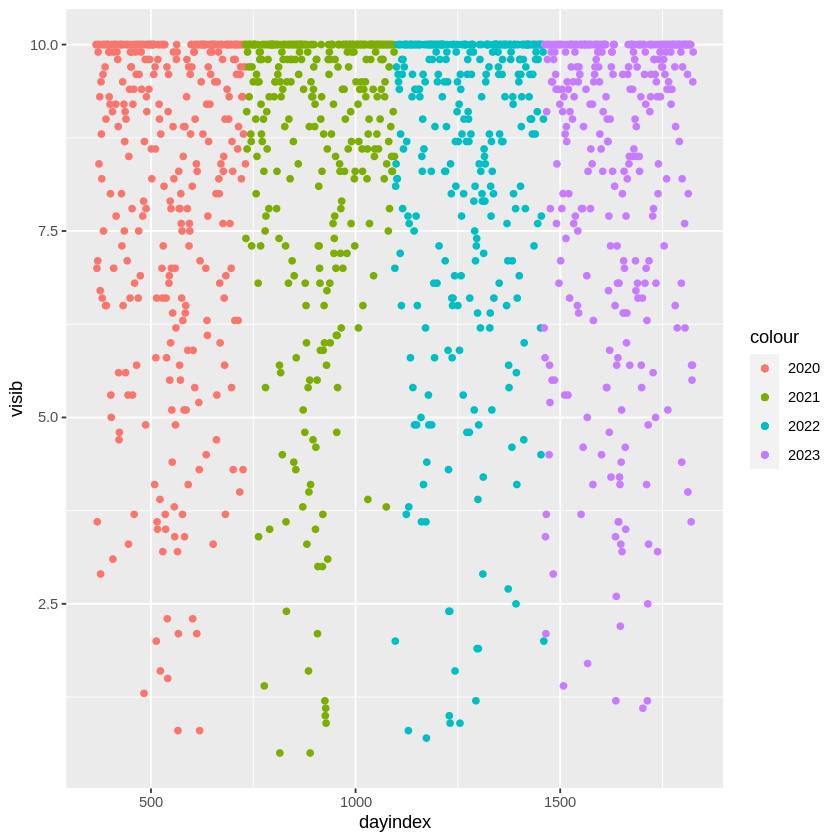

In [ ]:
ggplot() +
  geom_point(data=colsc20b, aes(dayindex, visib, color="2020")) +
  geom_point(data=colsc21b, aes(dayindex, visib, color="2021")) +
  geom_point(data=colsc22b, aes(dayindex, visib, color="2022")) +
  geom_point(data=colsc23b, aes(dayindex, visib, color="2023"))

Warning message:
“Removed 6 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 15 rows containing missing values (`geom_point()`).”


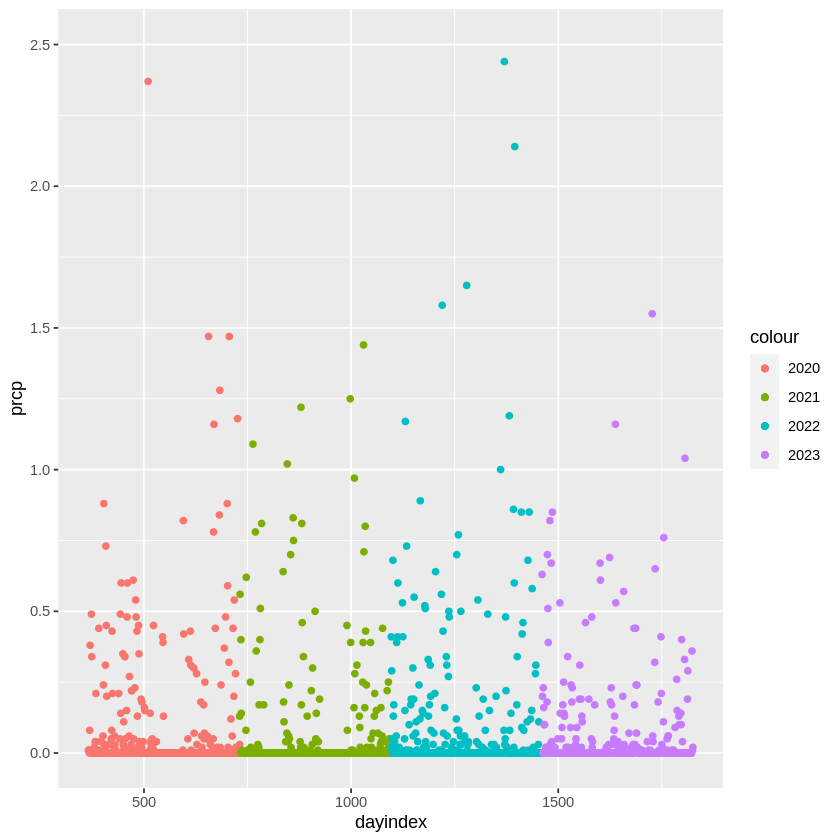

In [ ]:
sp <- ggplot() +
  geom_point(data=colsc20b, aes(dayindex, prcp, color="2020")) +
  geom_point(data=colsc21b, aes(dayindex, prcp, color="2021")) +
  geom_point(data=colsc22b, aes(dayindex, prcp, color="2022")) +
  geom_point(data=colsc23b, aes(dayindex, prcp, color="2023"))

sp+ylim(0, 2.5)

Looking at the graphs above, there is no major differences between the years and the weather apart from the temperature becoming more varied throughout the years before becoming less varied in 2023.

However, temperature clearly does not play a role in variance as 2022 was more varied than 2023 and yet has less varied number of collisions than 2023.

The variance is more likely due to the number of collisions reducing since 2020, as seen in the "Number of collisions by day of the year" graph near the top of the colab.

In [65]:
colsplitcheckcombined <- rbind(colsc20b, colsc21b, colsc22b, colsc23b)

In [66]:
cor(colsplitcheckcombined$visib, colsplitcheckcombined$NUM_COLLISIONS)

[1] -0.03424101

In [67]:
cor(colsplitcheckcombined$wdsp, colsplitcheckcombined$NUM_COLLISIONS)

[1] -0.07157158

In [68]:
cor(colsplitcheckcombined$prcp, colsplitcheckcombined$NUM_COLLISIONS)

[1] 0.05381107

In [69]:
cor(colsplitcheckcombined$fog, colsplitcheckcombined$NUM_COLLISIONS)

[1] 0.09558733

In [70]:
cor(colsplitcheckcombined$temp, colsplitcheckcombined$NUM_COLLISIONS)

[1] 0.254526

In [71]:
cor(colsplitcheckcombined$dewp, colsplitcheckcombined$NUM_COLLISIONS)

[1] 0.2229031

In [72]:
cor(colsplitcheckcombined$slp, colsplitcheckcombined$NUM_COLLISIONS)

[1] 0.004969906

In [73]:
cor(colsplitcheckcombined$max, colsplitcheckcombined$NUM_COLLISIONS)

[1] 0.2620684

In [74]:
cor(colsplitcheckcombined$min, colsplitcheckcombined$NUM_COLLISIONS)

[1] 0.2311535

In [75]:
cor(colsplitcheckcombined$gust, colsplitcheckcombined$NUM_COLLISIONS)

[1] 0.05135291

Combining the years together and looking at the different aspects of the weather correlated with the number of collisions, it shows that those affected by temperature (temp, max, min and dewp) have a stronger correlation to the number of collisions than any other metric.

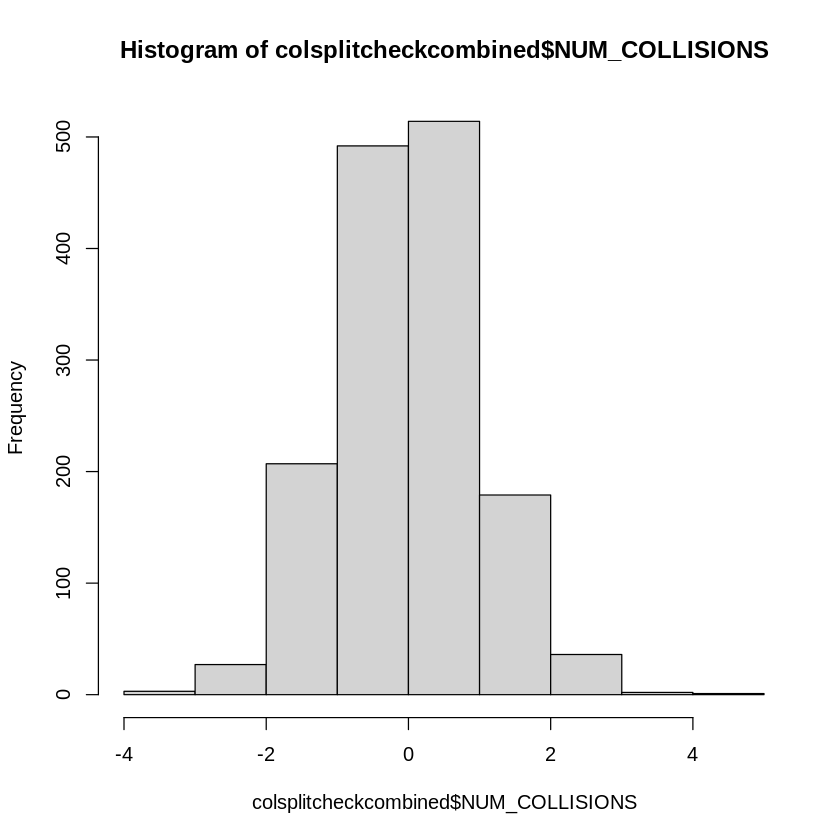

In [76]:
hist(colsplitcheckcombined$NUM_COLLISIONS, breaks = 8)

The following will reformat the data to be used in the linear regression and the deep neural network.

In [77]:
head(colsplitcheckcombined)

,dayindex,dayofyear,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
3092,366,1,3,2020,1,1,2020-01-01,40.3,29.9,1003.0,10.0,11.4,20.0,26.0,52.0,36.0,0.01,999.9,0,0.3401737
2810,367,2,4,2020,1,2,2020-01-02,39.6,28.9,1011.8,10.0,13.0,19.0,26.0,46.0,33.1,0.01,999.9,0,0.9481723
1776,368,3,5,2020,1,3,2020-01-03,45.8,42.9,1010.3,7.0,10.3,15.0,999.9,46.9,33.1,0.00,999.9,0,1.3383804
341,369,4,6,2020,1,4,2020-01-04,45.4,43.9,1005.6,3.6,5.7,9.9,999.9,48.9,44.1,0.08,999.9,1,0.4036960
4034,370,5,7,2020,1,5,2020-01-05,40.1,33.8,1001.6,7.1,17.0,27.0,38.1,48.9,36.0,0.38,999.9,1,-0.1589296
1696,371,6,1,2020,1,6,2020-01-06,33.5,24.0,1013.2,9.9,5.3,15.0,999.9,43.0,24.1,0.01,999.9,0,1.3656042


In [79]:
collinearregressiondata <- colsplitcheckcombined[,c(3,8,12,19,20)]

In [80]:
head(collinearregressiondata)

,day,temp,wdsp,fog,NUM_COLLISIONS
,<int>,<dbl>,<dbl>,<int>,<dbl>
3092,3,40.3,11.4,0,0.3401737
2810,4,39.6,13.0,0,0.9481723
1776,5,45.8,10.3,0,1.3383804
341,6,45.4,5.7,1,0.4036960
4034,7,40.1,17.0,1,-0.1589296
1696,1,33.5,5.3,0,1.3656042


In [81]:
write.csv(collinearregressiondata, file="/content/collinearregressiondata.csv")

For the linear regression data, the three largest correlations that differed from one another were chosen. These were temperature, wind speed and fog.

In [82]:
colsplitcheckcombined2 <- colsplitcheckcombined

In [83]:
colsplitcheckcombined2$mo[colsplitcheckcombined2$mo == 1] <- "Jan"
colsplitcheckcombined2$mo[colsplitcheckcombined2$mo == 2] <- "Feb"
colsplitcheckcombined2$mo[colsplitcheckcombined2$mo == 3] <- "Mar"
colsplitcheckcombined2$mo[colsplitcheckcombined2$mo == 4] <- "Apr"
colsplitcheckcombined2$mo[colsplitcheckcombined2$mo == 5] <- "May"
colsplitcheckcombined2$mo[colsplitcheckcombined2$mo == 6] <- "Jun"
colsplitcheckcombined2$mo[colsplitcheckcombined2$mo == 7] <- "Jul"
colsplitcheckcombined2$mo[colsplitcheckcombined2$mo == 8] <- "Aug"
colsplitcheckcombined2$mo[colsplitcheckcombined2$mo == 9] <- "Sep"
colsplitcheckcombined2$mo[colsplitcheckcombined2$mo == 10] <- "Oct"
colsplitcheckcombined2$mo[colsplitcheckcombined2$mo == 11] <- "Nov"
colsplitcheckcombined2$mo[colsplitcheckcombined2$mo == 12] <- "Dec"

In [84]:
colsplitcheckcombined2$day[colsplitcheckcombined2$day == 1] <- "Sun"
colsplitcheckcombined2$day[colsplitcheckcombined2$day == 2] <- "Mon"
colsplitcheckcombined2$day[colsplitcheckcombined2$day == 3] <- "Tue"
colsplitcheckcombined2$day[colsplitcheckcombined2$day == 4] <- "Wed"
colsplitcheckcombined2$day[colsplitcheckcombined2$day == 5] <- "Thu"
colsplitcheckcombined2$day[colsplitcheckcombined2$day == 6] <- "Fri"
colsplitcheckcombined2$day[colsplitcheckcombined2$day == 7] <- "Sat"

In [85]:
head(colsplitcheckcombined2)

,dayindex,dayofyear,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
,<dbl>,<dbl>,<chr>,<int>,<chr>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
3092,366,1,Tue,2020,Jan,1,2020-01-01,40.3,29.9,1003.0,10.0,11.4,20.0,26.0,52.0,36.0,0.01,999.9,0,0.3401737
2810,367,2,Wed,2020,Jan,2,2020-01-02,39.6,28.9,1011.8,10.0,13.0,19.0,26.0,46.0,33.1,0.01,999.9,0,0.9481723
1776,368,3,Thu,2020,Jan,3,2020-01-03,45.8,42.9,1010.3,7.0,10.3,15.0,999.9,46.9,33.1,0.00,999.9,0,1.3383804
341,369,4,Fri,2020,Jan,4,2020-01-04,45.4,43.9,1005.6,3.6,5.7,9.9,999.9,48.9,44.1,0.08,999.9,1,0.4036960
4034,370,5,Sat,2020,Jan,5,2020-01-05,40.1,33.8,1001.6,7.1,17.0,27.0,38.1,48.9,36.0,0.38,999.9,1,-0.1589296
1696,371,6,Sun,2020,Jan,6,2020-01-06,33.5,24.0,1013.2,9.9,5.3,15.0,999.9,43.0,24.1,0.01,999.9,0,1.3656042


In [86]:
months <- model.matrix(~0+colsplitcheckcombined2$mo)
head(months)

,colsplitcheckcombined2$moApr,colsplitcheckcombined2$moAug,colsplitcheckcombined2$moDec,colsplitcheckcombined2$moFeb,colsplitcheckcombined2$moJan,colsplitcheckcombined2$moJul,colsplitcheckcombined2$moJun,colsplitcheckcombined2$moMar,colsplitcheckcombined2$moMay,colsplitcheckcombined2$moNov,colsplitcheckcombined2$moOct,colsplitcheckcombined2$moSep
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,0,0


In [87]:
colnames(months) <- c("Apr", "Aug", "Dec", "Feb", "Jan", "Jul", "Jun", "Mar", "May", "Nov", "Oct", "Sep")

In [88]:
head(months)

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,0,0


In [89]:
daysofweek <- model.matrix(~0+colsplitcheckcombined2$day)
head(daysofweek)

,colsplitcheckcombined2$dayFri,colsplitcheckcombined2$dayMon,colsplitcheckcombined2$daySat,colsplitcheckcombined2$daySun,colsplitcheckcombined2$dayThu,colsplitcheckcombined2$dayTue,colsplitcheckcombined2$dayWed
1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0
5,0,0,1,0,0,0,0
6,0,0,0,1,0,0,0


In [90]:
colnames(daysofweek) <- c("Fri", "Mon", "Sat", "Sun", "Thu", "Tue", "Wed")

In [91]:
head(daysofweek)

,Fri,Mon,Sat,Sun,Thu,Tue,Wed
1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0
5,0,0,1,0,0,0,0
6,0,0,0,1,0,0,0


In [102]:
coldeepneuralnetworkdata <- data.frame(months, daysofweek, colsplitcheckcombined2$year, colsplitcheckcombined2$temp, colsplitcheckcombined2$wdsp, colsplitcheckcombined2$fog, colsplitcheckcombined2$NUM_COLLISIONS)

In [103]:
colnames(coldeepneuralnetworkdata)[which(names(coldeepneuralnetworkdata) == "colsplitcheckcombined2.year")] <- "year"
colnames(coldeepneuralnetworkdata)[which(names(coldeepneuralnetworkdata) == "colsplitcheckcombined2.temp")] <- "temp"
colnames(coldeepneuralnetworkdata)[which(names(coldeepneuralnetworkdata) == "colsplitcheckcombined2.wdsp")] <- "wdsp"
colnames(coldeepneuralnetworkdata)[which(names(coldeepneuralnetworkdata) == "colsplitcheckcombined2.fog")] <- "fog"
colnames(coldeepneuralnetworkdata)[which(names(coldeepneuralnetworkdata) == "colsplitcheckcombined2.NUM_COLLISIONS")] <- "NUM_COLLISIONS"

In [104]:
summary(coldeepneuralnetworkdata)

      Apr               Aug               Dec               Feb         
 Min.   :0.00000   Min.   :0.00000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :0.00000   Median :0.00000   Median :0.00000   Median :0.00000  
 Mean   :0.08214   Mean   :0.08487   Mean   :0.08487   Mean   :0.07734  
 3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000  
 Max.   :1.00000   Max.   :1.00000   Max.   :1.00000   Max.   :1.00000  
      Jan               Jul               Jun               Mar         
 Min.   :0.00000   Min.   :0.00000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :0.00000   Median :0.00000   Median :0.00000   Median :0.00000  
 Mean   :0.08487   Mean   :0.08487   Mean   :0.08214   Mean   :0.08487  
 3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000  
 Max.   :1.00000   Max.   :1.00000   Max.   :1.0000

In [105]:
head(coldeepneuralnetworkdata)

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,⋯,Sat,Sun,Thu,Tue,Wed,year,temp,wdsp,fog,NUM_COLLISIONS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>
1,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,1,0,2020,40.3,11.4,0,0.3401737
2,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,1,2020,39.6,13.0,0,0.9481723
3,0,0,0,0,1,0,0,0,0,0,⋯,0,0,1,0,0,2020,45.8,10.3,0,1.3383804
4,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,2020,45.4,5.7,1,0.4036960
5,0,0,0,0,1,0,0,0,0,0,⋯,1,0,0,0,0,2020,40.1,17.0,1,-0.1589296
6,0,0,0,0,1,0,0,0,0,0,⋯,0,1,0,0,0,2020,33.5,5.3,0,1.3656042


In [106]:
write.csv(coldeepneuralnetworkdata, file="/content/coldeepneuralnetworkdata.csv")